In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
bikeshare = pd.read_csv('C:/Users/chceg/OneDrive/Pulpit/dane sql/biketrips.csv')
temperature = pd.read_csv('C:/Users/chceg/OneDrive/Pulpit/dane sql/temperature.csv')
weather_description = pd.read_csv('C:/Users/chceg/OneDrive/Pulpit/dane sql/weather_description.csv')

In [3]:
bikeshare

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,1147651,295,2016-04-04 08:19:00 UTC,Mezes,83,2016-04-04 08:24:00 UTC,Redwood City Caltrain Station,22,138,94063,...,Subscriber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,284719,1053,2014-05-14 22:50:00 UTC,Japantown,9,2014-05-14 23:08:00 UTC,Japantown,9,72,95112,...,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110072,87,2013-11-27 17:55:00 UTC,Japantown,9,2013-11-27 17:57:00 UTC,Japantown,9,297,95112,...,Subscriber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4534,1439,2013-08-29 13:43:00 UTC,Japantown,9,2013-08-29 14:07:00 UTC,Japantown,9,644,95125,...,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,911234,8216,2015-08-30 10:00:00 UTC,Japantown,9,2015-08-30 12:17:00 UTC,Japantown,9,668,95111,...,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947412,20170802131440819,26130,2017-08-02 13:14:40 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,2017-08-02 20:30:10 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,819,NaN,...,NaN,37.781074,-122.411738,37.781074,-122.411738,NaN,NaN,NaN,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947413,201803282126351182,1119,2018-03-28 21:26:35 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,2018-03-28 21:45:14 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,1182,NaN,...,NaN,37.781074,-122.411738,37.781074,-122.411738,1959.0,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947414,201804061846063345,3469,2018-04-06 18:46:06 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,2018-04-06 19:43:56 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,3345,NaN,...,NaN,37.781074,-122.411738,37.781074,-122.411738,1959.0,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947415,201711181558431264,13037,2017-11-18 15:58:43 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,2017-11-18 19:36:01 UTC,Civic Center/UN Plaza BART Station (Market St ...,44,1264,NaN,...,NaN,37.781074,-122.411738,37.781074,-122.411738,NaN,NaN,NaN,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)


In [4]:
bikeshare['start_date'] = bikeshare['start_date'].str[:-4]
bikeshare['end_date'] = bikeshare['end_date'].str[:-4]

In [5]:
import pandas as pd

# Wczytaj dane (zakładając, że masz DataFrame o nazwie df)
# df = pd.read_csv('nazwa_pliku.csv')

# Sprawdź format kolumny z datami
print(bikeshare['start_date'].dtype)

# Jeśli format nie jest datą, przekształć go
bikeshare['start_date'] = pd.to_datetime(bikeshare['start_date'])

# Sprawdź ponownie format kolumny z datami
print(bikeshare['start_date'].dtype)

# Znajdź minimalną i maksymalną datę
min_date = bikeshare['start_date'].min()
max_date = bikeshare['start_date'].max()

print(f"Najwcześniejsza data: {min_date}")
print(f"Najnowsza data: {max_date}")

object
datetime64[ns]
Najwcześniejsza data: 2013-08-29 09:08:00
Najnowsza data: 2018-04-30 23:58:45


In [6]:
# Sprawdź format kolumny z datami
print(bikeshare['start_date'].dtype)
# Jeśli format nie jest datą, przekształć go
bikeshare['start_date'] = pd.to_datetime(bikeshare['start_date'])
# Sprawdź ponownie format kolumny z datami
print(bikeshare['start_date'].dtype)
# Wybierz wiersze z datami między '2014-01-01' a '2017-12-30'
bikeshare = bikeshare[(bikeshare['start_date'] >= '2014-01-01') & (bikeshare['start_date'] <= '2017-12-31')]


datetime64[ns]
datetime64[ns]


In [7]:
# import sqlalchemy and create a sqlite engine
engine = create_engine('sqlite://', echo=False)

In [8]:
bikeshare.to_sql("bikeshare", con=engine)
temperature.to_sql("temperature", con=engine)
weather_description.to_sql("weather_description", con=engine)

In [9]:
query = engine.execute("""SELECT AVG(duration_sec) AS sredni_czas_przejazdu
FROM bikeshare;
    
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,sredni_czas_przejazdu
0,1026.544723


In [10]:
query = engine.execute("""SELECT datetime ,"San Francisco"
FROM temperature;
    
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,datetime,San Francisco
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,289.480000
2,2012-10-01 14:00:00,289.474993
3,2012-10-01 15:00:00,289.460618
4,2012-10-01 16:00:00,289.446243
...,...,...
45248,2017-11-29 20:00:00,NaN
45249,2017-11-29 21:00:00,NaN
45250,2017-11-29 22:00:00,NaN
45251,2017-11-29 23:00:00,NaN


In [11]:
df.iloc[44460]

datetime         2017-10-28 00:00:00
San Francisco                 302.07
Name: 44460, dtype: object

In [12]:
query = engine.execute("""SELECT datetime ,"San Francisco"
FROM weather_description;
    
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,datetime,San Francisco
0,2012-10-01 12:00:00,None
1,2012-10-01 13:00:00,light rain
2,2012-10-01 14:00:00,sky is clear
3,2012-10-01 15:00:00,sky is clear
4,2012-10-01 16:00:00,sky is clear
...,...,...
45248,2017-11-29 20:00:00,None
45249,2017-11-29 21:00:00,None
45250,2017-11-29 22:00:00,None
45251,2017-11-29 23:00:00,None


In [13]:
from sqlalchemy import create_engine, MetaData


# Uzyskiwanie informacji o tabeli
metadata = MetaData(bind=engine)
metadata.reflect()
table = metadata.tables['temperature']

# Wyświetlanie informacji o kolumnach
for column in table.columns:
    print(column.name, column.type)


index BIGINT
datetime TEXT
Vancouver FLOAT
Portland FLOAT
San Francisco FLOAT
Seattle FLOAT
Los Angeles FLOAT
San Diego FLOAT
Las Vegas FLOAT
Phoenix FLOAT
Albuquerque FLOAT
Denver FLOAT
San Antonio FLOAT
Dallas FLOAT
Houston FLOAT
Kansas City FLOAT
Minneapolis FLOAT
Saint Louis FLOAT
Chicago FLOAT
Nashville FLOAT
Indianapolis FLOAT
Atlanta FLOAT
Detroit FLOAT
Jacksonville FLOAT
Charlotte FLOAT
Miami FLOAT
Pittsburgh FLOAT
Toronto FLOAT
Philadelphia FLOAT
New York FLOAT
Montreal FLOAT
Boston FLOAT
Beersheba FLOAT
Tel Aviv District FLOAT
Eilat FLOAT
Haifa FLOAT
Nahariyya FLOAT
Jerusalem FLOAT


In [14]:
bikeshare

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,1147651,295,2016-04-04 08:19:00,Mezes,83,2016-04-04 08:24:00,Redwood City Caltrain Station,22,138,94063,...,Subscriber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,284719,1053,2014-05-14 22:50:00,Japantown,9,2014-05-14 23:08:00,Japantown,9,72,95112,...,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,911234,8216,2015-08-30 10:00:00,Japantown,9,2015-08-30 12:17:00,Japantown,9,668,95111,...,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1258860,525,2016-06-29 08:13:00,Japantown,9,2016-06-29 08:22:00,MLK Library,11,116,95112,...,Subscriber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,541583,348,2014-11-12 15:34:00,Japantown,9,2014-11-12 15:39:00,MLK Library,11,668,95112,...,Subscriber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947405,201708101840052616,829,2017-08-10 18:40:05,Civic Center/UN Plaza BART Station (Market St ...,44,2017-08-10 18:53:55,Montgomery St BART Station (Market St at 2nd St),21,2616,NaN,...,NaN,37.781074,-122.411738,37.789625,-122.400811,1985.0,Female,NaN,POINT(-122.4117382 37.7810737),POINT(-122.400811 37.7896254)
1947407,201711080652463111,356,2017-11-08 06:52:46,Civic Center/UN Plaza BART Station (Market St ...,44,2017-11-08 06:58:43,Montgomery St BART Station (Market St at 2nd St),21,3111,NaN,...,NaN,37.781074,-122.411738,37.789625,-122.400811,1985.0,Male,NaN,POINT(-122.4117382 37.7810737),POINT(-122.400811 37.7896254)
1947408,201710300756121740,682,2017-10-30 07:56:12,Civic Center/UN Plaza BART Station (Market St ...,44,2017-10-30 08:07:35,San Francisco Ferry Building (Harry Bridges Pl...,15,1740,NaN,...,NaN,37.781074,-122.411738,37.795392,-122.394203,1980.0,Female,NaN,POINT(-122.4117382 37.7810737),POINT(-122.394203 37.795392)
1947412,20170802131440819,26130,2017-08-02 13:14:40,Civic Center/UN Plaza BART Station (Market St ...,44,2017-08-02 20:30:10,Civic Center/UN Plaza BART Station (Market St ...,44,819,NaN,...,NaN,37.781074,-122.411738,37.781074,-122.411738,NaN,NaN,NaN,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)


In [15]:
query = engine.execute("""
WITH TripDurations AS (
  SELECT 
    CASE
      WHEN duration_sec <= 300 THEN '0-5 minutes'
      WHEN duration_sec > 300 AND duration_sec <= 600 THEN '05-10 minutes'
      WHEN duration_sec > 600 AND duration_sec <= 900 THEN '10-15 minutes'
      WHEN duration_sec > 900 AND duration_sec <= 1200 THEN '15-20 minutes'
      WHEN duration_sec > 1200 AND duration_sec <= 1800 THEN '20-30 minutes'
      WHEN duration_sec > 1800 AND duration_sec <= 3600 THEN '30-60 minutes'
      ELSE '60+ minutes'
    END AS duration_category,
    subscriber_type AS user_type
  FROM bikeshare
)

SELECT 
  duration_category,
  SUM(CASE WHEN user_type = 'Customer' THEN 1 ELSE 0 END) AS customer_trips,
  SUM(CASE WHEN user_type = 'Subscriber' THEN 1 ELSE 0 END) AS subscriber_trips,
  CAST(SUM(CASE WHEN user_type = 'Customer' THEN 1 ELSE 0 END) AS FLOAT) / CAST((SELECT COUNT(trip_id) FROM bikeshare WHERE c_subscription_type = 'Customer') AS FLOAT) AS percentage_customer_trips,
  CAST(SUM(CASE WHEN user_type = 'Subscriber' THEN 1 ELSE 0 END) AS FLOAT) / CAST((SELECT COUNT(trip_id) FROM bikeshare WHERE c_subscription_type = 'Subscriber') AS FLOAT)  AS percentage_subscriber_trips
FROM TripDurations
GROUP BY duration_category
ORDER BY duration_category;
    
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,duration_category,customer_trips,subscriber_trips,percentage_customer_trips,percentage_subscriber_trips
0,0-5 minutes,4450,73320,0.039622,0.095125
1,05-10 minutes,18341,165627,0.163307,0.214884
2,10-15 minutes,21112,96438,0.187980,0.125119
3,15-20 minutes,17127,39997,0.152498,0.051892
4,20-30 minutes,22512,23687,0.200445,0.030731
5,30-60 minutes,12603,7004,0.112216,0.009087
6,60+ minutes,13704,2368,0.122019,0.003072


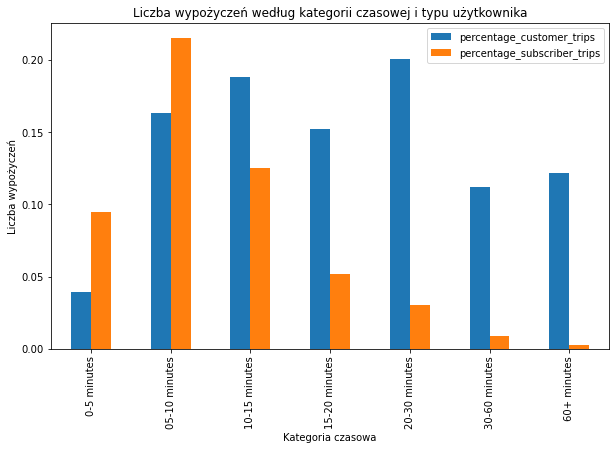

In [16]:
# Wyświetlenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(10, 6))

df.plot(kind='bar', x='duration_category', y=['percentage_customer_trips', 'percentage_subscriber_trips'], ax=ax)
plt.title('Liczba wypożyczeń według kategorii czasowej i typu użytkownika')
plt.xlabel('Kategoria czasowa')
plt.ylabel('Liczba wypożyczeń')

plt.show()

In [17]:
query = engine.execute("""
SELECT COUNT(trip_id)
FROM bikeshare
WHERE c_subscription_type = 'Subscriber'
    
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,COUNT(trip_id)
0,770773


In [18]:
query = engine.execute("""
SELECT MIN(start_date) AS oldest_start_date, MAX(start_date) AS newest_start_date
FROM bikeshare
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,oldest_start_date,newest_start_date
0,2014-01-01 00:14:00.000000,2017-12-30 23:46:13.000000


In [19]:
query = engine.execute("""
SELECT bike_number, COUNT(*) AS trip_count
FROM bikeshare
WHERE start_date >= '2017-06-01'
AND   start_date <= '2017-09-01'
GROUP BY bike_number
ORDER BY COUNT(*) DESC
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df.head(10)


,bike_number,trip_count
0,752,182
1,917,181
2,133,181
3,924,176
4,235,174
5,913,172
6,20,172
7,930,171
8,873,170
9,136,170


In [20]:
######################################STWORZ TRIGGER KTORY POKAZE JAKIS MONIT JESLI JAKIS ROWER BYL UZYWANY W TYM MIESIACU 100 razy
query = engine.execute("""
SELECT bike_number, COUNT(*) AS trip_count
FROM bikeshare
WHERE start_date >= DATE('now', '-1 month')
AND   start_date <= DATE('now')
GROUP BY bike_number
ORDER BY COUNT(*) DESC
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df.head(10)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [21]:
query = engine.execute("""
SELECT 
  strftime('%H', start_date) AS hour_of_day,
  c_subscription_type,
  COUNT(*) AS number_of_trips
FROM bikeshare
WHERE c_subscription_type IN ('Customer', 'Subscriber')
GROUP BY hour_of_day, c_subscription_type
ORDER BY hour_of_day, c_subscription_type;
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,hour_of_day,c_subscription_type,number_of_trips
0,00,Customer,655
1,00,Subscriber,1817
2,01,Customer,478
3,01,Subscriber,861
4,02,Customer,303
5,02,Subscriber,391
6,03,Customer,154
7,03,Subscriber,374
8,04,Customer,122
9,04,Subscriber,1072


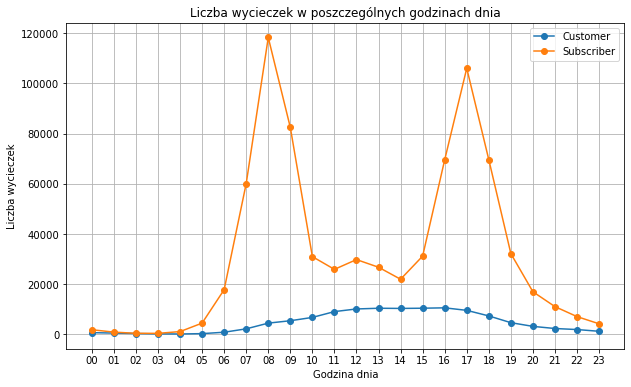

In [22]:
# Rozdzielenie danych na dwie kategorie (Customer i Subscriber)
customer_data = df[df['c_subscription_type'] == 'Customer']
subscriber_data = df[df['c_subscription_type'] == 'Subscriber']

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

# Wykres dla Customer
plt.plot(customer_data['hour_of_day'], customer_data['number_of_trips'], label='Customer', marker='o')

# Wykres dla Subscriber
plt.plot(subscriber_data['hour_of_day'], subscriber_data['number_of_trips'], label='Subscriber', marker='o')

# Ustawienia wykresu
plt.title('Liczba wycieczek w poszczególnych godzinach dnia')
plt.xlabel('Godzina dnia')
plt.ylabel('Liczba wycieczek')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\chceg\AppData\Local\Temp/ipykernel_28628/2510523844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['percentage'] = (customer_data['number_of_trips'] / customer_data['number_of_trips'].sum()) * 100
C:\Users\chceg\AppData\Local\Temp/ipykernel_28628/2510523844.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscriber_data['percentage'] = (subscriber_data['number_of_trips'] / subscriber_data['number_of_trips'].sum()) * 100


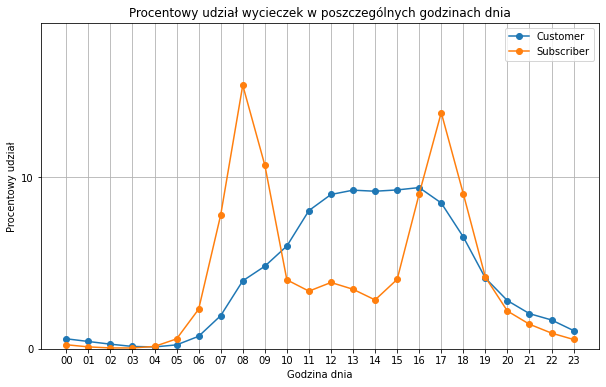

In [23]:
# Rozdzielenie danych na dwie kategorie (Customer i Subscriber)
customer_data = df[df['c_subscription_type'] == 'Customer']
subscriber_data = df[df['c_subscription_type'] == 'Subscriber']

# Obliczanie procentowego udziału
customer_data['percentage'] = (customer_data['number_of_trips'] / customer_data['number_of_trips'].sum()) * 100
subscriber_data['percentage'] = (subscriber_data['number_of_trips'] / subscriber_data['number_of_trips'].sum()) * 100

# Tworzenie wykresu liniowego
plt.figure(figsize=(10, 6))

# Wykres dla Customer
plt.plot(customer_data['hour_of_day'], customer_data['percentage'], label='Customer', marker='o')

# Wykres dla Subscriber
plt.plot(subscriber_data['hour_of_day'], subscriber_data['percentage'], label='Subscriber', marker='o')

# Ustawienia wykresu
plt.title('Procentowy udział wycieczek w poszczególnych godzinach dnia')
plt.xlabel('Godzina dnia')
plt.ylabel('Procentowy udział')
plt.legend()
plt.grid(True)

# Dostosowanie skali osi
plt.xticks(range(24))
plt.yticks(range(0, int(max(customer_data['percentage'])) + 10, 10))
plt.ylim(0, min(100, int(max(customer_data['percentage'])) + 10))  # Ograniczenie do 100%

plt.show()

In [24]:
query = engine.execute("""
SELECT 
    strftime('%m', start_date) AS month,
    COUNT(*) AS total_trips
FROM bikeshare
WHERE start_date >= '2014-01-01'
AND   start_date <= '2018-01-01'
GROUP BY month
ORDER BY month
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df



,month,total_trips
0,01,71787
1,02,69985
2,03,81777
3,04,84196
4,05,86364
5,06,94361
6,07,133612
7,08,176765
8,09,160636
9,10,174210


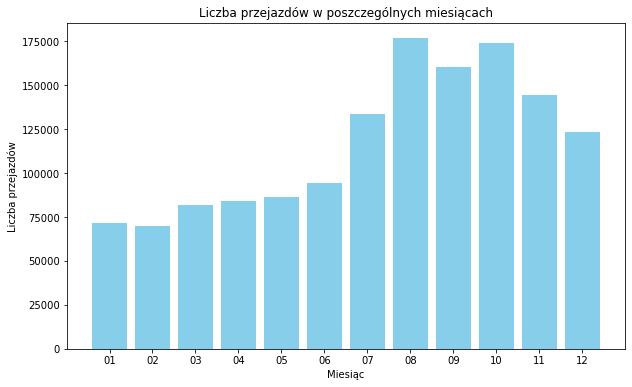

In [25]:
# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(df['month'], df['total_trips'], color='skyblue')
plt.title('Liczba przejazdów w poszczególnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba przejazdów')
plt.show()

In [26]:
query = engine.execute("""
SELECT 
    strftime('%m', start_date) AS month,
    subscriber_type,
    COUNT(*) AS total_trips
FROM bikeshare
WHERE start_date >= '2014-01-01'
AND   start_date <= '2018-01-01'
GROUP BY month, subscriber_type
ORDER BY month, subscriber_type
""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df


,month,subscriber_type,total_trips
0,01,None,71787
1,02,None,69985
2,03,None,81777
3,04,None,84196
4,05,None,86364
5,06,None,91672
6,06,Customer,450
7,06,Subscriber,2239
8,07,None,89539
9,07,Customer,12978


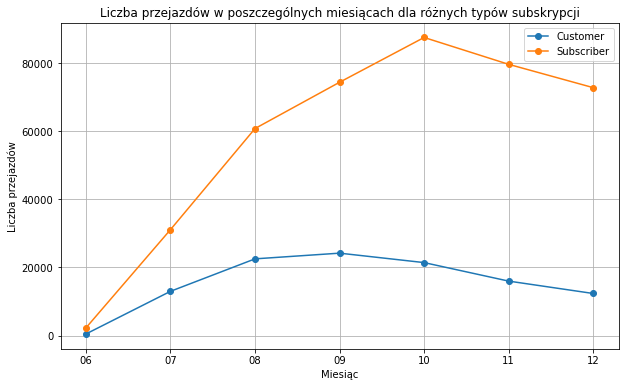

In [27]:
# Konwersja numeru miesiąca na nazwę
df['month_name'] = df['month'].astype(int).apply(lambda x: f'{x:02d}')

# Tworzenie wykresu liniowego
plt.figure(figsize=(10, 6))
for subscriber_type, group_df in df.groupby('subscriber_type'):
    plt.plot(group_df['month_name'], group_df['total_trips'], label=subscriber_type, marker='o')

plt.title('Liczba przejazdów w poszczególnych miesiącach dla różnych typów subskrypcji')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba przejazdów')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
query = engine.execute("""
SELECT 
    strftime('%w', start_date) AS day_of_week,
    COUNT(*) AS total_trips
FROM bikeshare
GROUP BY day_of_week
ORDER BY total_trips DESC;

""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df


,day_of_week,total_trips
0,2,255658
1,3,252598
2,4,245039
3,1,234953
4,5,224394
5,6,101587
6,0,87144


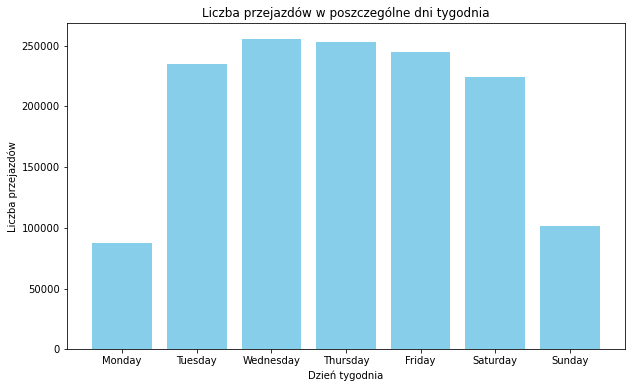

In [29]:
# Konwersja numeru dnia tygodnia na nazwę
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].astype(int).apply(lambda x: day_names[x])

# Określenie niestandardowego porządku dni tygodnia
custom_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=custom_day_order, ordered=True)

# Posortowanie DataFrame według niestandardowego porządku dni tygodnia
df = df.sort_values('day_name')

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(df['day_name'], df['total_trips'], color='skyblue')
plt.title('Liczba przejazdów w poszczególne dni tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba przejazdów')
plt.show()

Okej to cos opis bym uderzyl ze Analizy wynika że subscriberzy korzystaja z rowerow w dojezdzie do pracy i dlatego podczas srodka dnia jet taki spadek aktywnosci, wiec moze rozwiazaniem zeby podniesc sprzedaz wsrod customerow jest jakies rozwiazanie promujace casualowa jazde w srodku dnia zeby wykorzystac jakos ta przestrzen bo i tak stoja wolne rowery

Uderzyl bym ze wymyslilem pytanie o najczesciej uzywany rower i ze zrobic jakis triger zeby pokazywalo ktore rowery wymienic jesli jakis byl szczegolnie eksplatowany w danym miesiacu i najlepiej jakiego dnia i dotego jest potrzebna analiza dniowa z ktorej wynika ze najlepiej zrobic to w niedziele, poniedzialek

In [30]:
query = engine.execute("""
SELECT 
    strftime('%w', start_date) AS day_of_week,
    subscriber_type,
    COUNT(*) AS total_trips
FROM bikeshare
GROUP BY day_of_week, subscriber_type
ORDER BY day_of_week, total_trips DESC;


""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df


,day_of_week,subscriber_type,total_trips
0,0,None,43163
1,0,Subscriber,24701
2,0,Customer,19280
3,1,None,153543
4,1,Subscriber,68604
5,1,Customer,12806
6,2,None,167793
7,2,Subscriber,75128
8,2,Customer,12737
9,3,None,164846


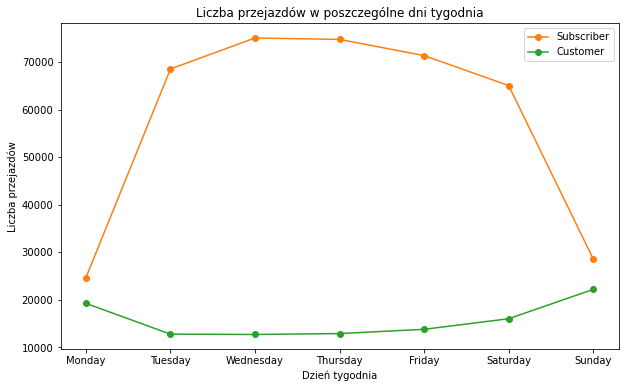

In [31]:
# Konwersja numeru dnia tygodnia na nazwę
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].astype(int).apply(lambda x: day_names[x])

# Tworzenie wykresu liniowego
plt.figure(figsize=(10, 6))
for sub_type in df['subscriber_type'].unique():
    subset = df[df['subscriber_type'] == sub_type]
    plt.plot(subset['day_name'], subset['total_trips'], label=sub_type, marker='o')

plt.title('Liczba przejazdów w poszczególne dni tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba przejazdów')
plt.legend()
plt.show()

In [32]:
view_query = """
CREATE VIEW SanFranciscoWeather AS
SELECT t.datetime ,t."San Francisco" - 273.15 AS temperature_celsius,wd."San Francisco" AS WeatherDescription
FROM temperature t
INNER JOIN weather_description wd ON t.datetime = wd.datetime 
"""
engine.execute(view_query)


In [33]:
query = engine.execute("""
SELECT * FROM SanFranciscoWeather


""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

df

,datetime,temperature_celsius,WeatherDescription
0,2012-10-01 12:00:00,NaN,None
1,2012-10-01 13:00:00,16.330000,light rain
2,2012-10-01 14:00:00,16.324993,sky is clear
3,2012-10-01 15:00:00,16.310618,sky is clear
4,2012-10-01 16:00:00,16.296243,sky is clear
...,...,...,...
45248,2017-11-29 20:00:00,NaN,None
45249,2017-11-29 21:00:00,NaN,None
45250,2017-11-29 22:00:00,NaN,None
45251,2017-11-29 23:00:00,NaN,None


In [34]:
query = engine.execute(""" 
SELECT trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,c_subscription_type,temperature_celsius,WeatherDescription
FROM bikeshare b
INNER JOIN SanFranciscoWeather sfw 
ON strftime('%Y-%m-%d %H:00:00', b.start_date) = sfw.datetime;


""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()



In [35]:
df

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,c_subscription_type,temperature_celsius,WeatherDescription
0,1147651,295,2016-04-04 08:19:00.000000,Mezes,83,2016-04-04 08:24:00,Redwood City Caltrain Station,22,138,Subscriber,11.084601,few clouds
1,284719,1053,2014-05-14 22:50:00.000000,Japantown,9,2014-05-14 23:08:00,Japantown,9,72,Customer,24.342000,sky is clear
2,911234,8216,2015-08-30 10:00:00.000000,Japantown,9,2015-08-30 12:17:00,Japantown,9,668,Customer,16.710000,broken clouds
3,1258860,525,2016-06-29 08:13:00.000000,Japantown,9,2016-06-29 08:22:00,MLK Library,11,116,Subscriber,15.150000,mist
4,541583,348,2014-11-12 15:34:00.000000,Japantown,9,2014-11-12 15:39:00,MLK Library,11,668,Subscriber,11.646500,broken clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
1311993,201708101840052616,829,2017-08-10 18:40:05.000000,Civic Center/UN Plaza BART Station (Market St ...,44,2017-08-10 18:53:55,Montgomery St BART Station (Market St at 2nd St),21,2616,None,17.540000,mist
1311994,201711080652463111,356,2017-11-08 06:52:46.000000,Civic Center/UN Plaza BART Station (Market St ...,44,2017-11-08 06:58:43,Montgomery St BART Station (Market St at 2nd St),21,3111,None,NaN,None
1311995,201710300756121740,682,2017-10-30 07:56:12.000000,Civic Center/UN Plaza BART Station (Market St ...,44,2017-10-30 08:07:35,San Francisco Ferry Building (Harry Bridges Pl...,15,1740,None,NaN,None
1311996,20170802131440819,26130,2017-08-02 13:14:40.000000,Civic Center/UN Plaza BART Station (Market St ...,44,2017-08-02 20:30:10,Civic Center/UN Plaza BART Station (Market St ...,44,819,None,15.620000,fog


In [36]:
query = engine.execute(""" 
SELECT count(trip_id),WeatherDescription
FROM bikeshare b
INNER JOIN SanFranciscoWeather sfw 
ON strftime('%Y-%m-%d %H:00:00', b.start_date) = sfw.datetime
GROUP BY WeatherDescription


""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

In [37]:
df

,count(trip_id),WeatherDescription
0,103449,None
1,106041,broken clouds
2,686,drizzle
3,99807,few clouds
4,23139,fog
5,85359,haze
6,132,heavy intensity drizzle
7,5557,heavy intensity rain
8,1795,light intensity drizzle
9,336,light intensity shower rain


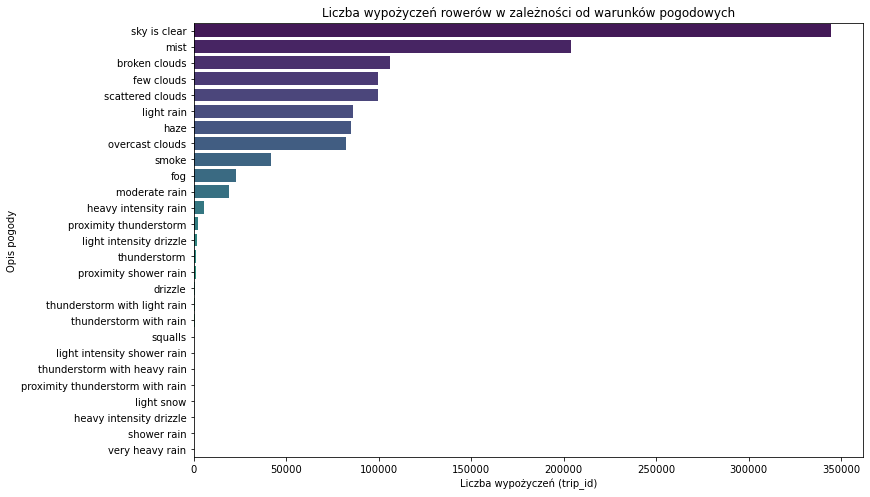

In [38]:
import seaborn as sns
# Sortowanie danych
df = df.sort_values(by='count(trip_id)', ascending=False)

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
sns.barplot(x='count(trip_id)', y='WeatherDescription', data=df, palette='viridis')
plt.title('Liczba wypożyczeń rowerów w zależności od warunków pogodowych')
plt.xlabel('Liczba wypożyczeń (trip_id)')
plt.ylabel('Opis pogody')
plt.show()

Zrob Prognoze popytu rowerow np regresja w ktorej przewidujesz srednie uzycie rowerow w zaleznosci od pogody w opisie uderz to pod katem wymieniania rowerow 

In [39]:
query = engine.execute(""" 
SELECT 
    DATE(datetime) AS Date,
    AVG(temperature_celsius) AS AvgTemperature,
    (
        SELECT WeatherDescription
        FROM SanFranciscoWeather AS sfw_sub
        WHERE DATE(sfw_sub.datetime) = DATE(SanFranciscoWeather.datetime)
        GROUP BY WeatherDescription
        ORDER BY COUNT(*) DESC
        LIMIT 1
    ) AS MostFrequentWeather,
    COUNT(*) AS WeatherCount
FROM SanFranciscoWeather
GROUP BY Date
ORDER BY Date;


""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()

In [40]:
df

,Date,AvgTemperature,MostFrequentWeather,WeatherCount
0,2012-10-01,16.266642,sky is clear,12
1,2012-10-02,19.808306,sky is clear,24
2,2012-10-03,23.779167,sky is clear,24
3,2012-10-04,22.537083,sky is clear,24
4,2012-10-05,17.485417,few clouds,24
...,...,...,...,...
1882,2017-11-26,NaN,None,24
1883,2017-11-27,NaN,None,24
1884,2017-11-28,NaN,None,24
1885,2017-11-29,NaN,None,24


In [41]:

# Przykładowe dane (zakładając, że masz DataFrame o nazwie df)
# df = ...

# Konwertowanie kolumny 'Date' do formatu daty
df['Date'] = pd.to_datetime(df['Date'])

# Wyodrębnienie roku i miesiąca
df['month'] = df['Date'].dt.to_period('M')

# Grupowanie i obliczanie średnich oraz maksymalnych wartości
result_df = df.groupby('month').agg({
    'AvgTemperature': 'mean',
    'MostFrequentWeather': 'first',  # bierzemy pierwszą wartość, zakładając, że wartość się nie zmienia w obrębie miesiąca
    'WeatherCount': 'max'
}).reset_index()

# Wyświetlenie wynikowego DataFrame
result_df

,month,AvgTemperature,MostFrequentWeather,WeatherCount
0,2012-10,16.463735,sky is clear,24
1,2012-11,13.442826,mist,24
2,2012-12,10.253330,mist,24
3,2013-01,8.244927,sky is clear,24
4,2013-02,10.048898,sky is clear,24
...,...,...,...,...
57,2017-07,20.183237,light rain,24
58,2017-08,19.189323,mist,24
59,2017-09,20.669971,smoke,24
60,2017-10,17.488031,sky is clear,24


In [42]:
result_df.head(50)

,month,AvgTemperature,MostFrequentWeather,WeatherCount
0,2012-10,16.463735,sky is clear,24
1,2012-11,13.442826,mist,24
2,2012-12,10.253330,mist,24
3,2013-01,8.244927,sky is clear,24
4,2013-02,10.048898,sky is clear,24
5,2013-03,12.079107,mist,24
6,2013-04,14.571578,mist,24
7,2013-05,16.228036,sky is clear,24
8,2013-06,17.493767,mist,24
9,2013-07,18.605093,mist,24


In [43]:
df['MostFrequentWeather'].nunique()

15

In [44]:
weather_counts = df['MostFrequentWeather'].value_counts()

In [45]:
weather_counts

sky is clear             685
mist                     500
light rain               135
broken clouds            118
few clouds               102
overcast clouds           90
scattered clouds          79
haze                      76
moderate rain             28
smoke                     17
fog                       13
heavy intensity rain       5
heavy snow                 3
thunderstorm               1
proximity shower rain      1
Name: MostFrequentWeather, dtype: int64

In [51]:
query = engine.execute(""" 
SELECT
    strftime('%m', start_date) AS month,
    WeatherDescription,
    AVG(duration_sec) AS avg_duration,
    AVG(temperature_celsius) AS avg_temperature,
    COUNT(trip_id) AS trip_count
FROM
    bikeshare b
INNER JOIN
    SanFranciscoWeather sfw ON strftime('%Y-%m-%d %H:00:00', b.start_date) = sfw.datetime
GROUP BY
    month
ORDER BY
    month;

""")
df = pd.DataFrame(query.fetchall())
df.columns = query.keys()


In [52]:
df

,month,WeatherDescription,avg_duration,avg_temperature,trip_count
0,01,sky is clear,909.494087,10.145055,71787
1,02,haze,941.486861,11.041772,69985
2,03,broken clouds,954.491520,12.204458,81777
3,04,few clouds,941.913357,12.853097,84196
4,05,sky is clear,1011.149159,14.187928,86364
5,06,mist,1020.892074,15.697437,94361
6,07,mist,1196.160487,18.051178,133612
7,08,broken clouds,1112.956094,17.467447,176765
8,09,few clouds,1087.182444,18.041079,160636
9,10,fog,981.889748,15.308073,174210


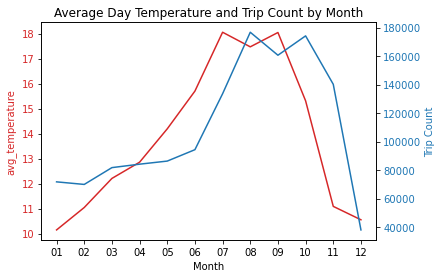

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Przykładowe dane (zakładając, że masz DataFrame o nazwie df)
# df = ...

# Utwórz dwie osie Y, aby różne kategorie miały różne skale
fig, ax1 = plt.subplots()

# Pierwsza oś Y (lewa) dla 'avg_day_temperature'
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('avg_temperature', color=color)
ax1.plot(df['month'], df['avg_temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Druga oś Y (prawa) dla 'trip_count'
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Trip Count', color=color)
ax2.plot(df['month'], df['trip_count'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ustawienia ogólne wykresu
plt.title('Average Day Temperature and Trip Count by Month')
plt.show()
